In [5]:
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for visualization (plotting)
from math import exp

# to display plots inline (with the rest of the output) rather than in a separate window
%matplotlib inline

[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1]


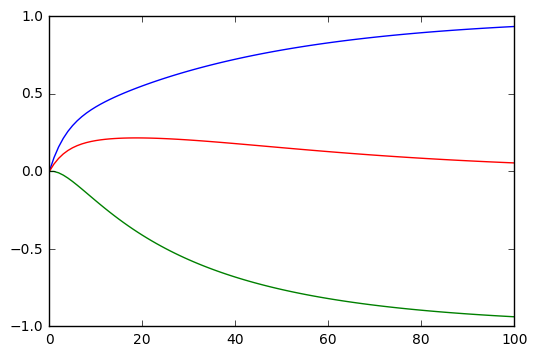

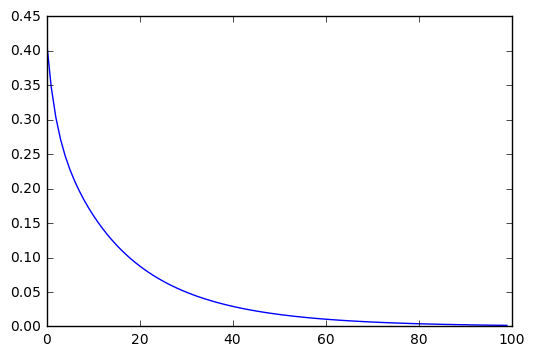

[ 0.935 -0.938  0.055]
[ 0.93513838]
[ 0.99010513]
[-0.00250262]
[ 0.05246413]


In [175]:
def t(x,y):
    return x or y

class Machine:
    def __init__(self, n):
        self.w = np.zeros(n)
    def h(self, x):
        return (self.w * x).sum(axis=1)

def get_correct_values(x):
    #seed = 125
    #np.random.seed(seed)
    #w = np.random.randint(-5, 6, x.shape[1])
    #w = np.random.randint(-100, 100, x.shape[1])
    #print(w)
    #return (w * x).sum(axis=1)
    ret = []
    for xs in x:
        ret.append(int(xs[0] != xs[1]))
    print(ret)    
    return ret

def gradient_descent(machine, training_set, correct_values, alpha, iterations):
    m = training_set.shape[0]
    n = training_set.shape[1]
    values = []
    values.append(np.copy(machine.w))
    losses = []
    for i in range(0, iterations):
        d = (machine.h(training_set) - correct_values).dot(training_set)
        machine.w -= alpha * d / m
        values.append(np.copy(machine.w))
        losses.append(((machine.h(training_set) - correct_values)**2).sum() / m)
    #print(losses)    
    plt.plot(values)
    plt.show()
    plt.plot(losses)
    plt.show()

def trainer(m, alpha, iterations, seed, n):
    np.random.seed(seed)
    training_set = np.random.randint(0, 2, (m,n))
    training_set = np.insert(training_set, 0, 1, axis=1)
    #print(training_set)
    correct_values = get_correct_values(training_set)
    machine = Machine(n + 1)
    #print(machine.h(np.array([[1,1]])))
    gradient_descent(machine, training_set, correct_values, alpha, iterations)
    print(np.around(machine.w, decimals=3))
    print(machine.h(np.array([[1,0,0]])))
    print(machine.h(np.array([[1,0,1]])))
    print(machine.h(np.array([[1,1,0]])))
    print(machine.h(np.array([[1,1,1]])))

trainer(m = 100, alpha = 0.17, iterations = 100, seed = 5, n = 2)

Algorithm fails miserably when checking the results but somehow tells the loss is very low in the end.

For classification we want our hypothesis to return a value between 0 and 1, ie. probability for the value being 0 or 1, false or true. To do this we can use the sigmoid function:

$\displaystyle \sigma(z)=\frac{1}{1+e^{-z}}$

Sigmoid function always returns a value between 0 and 1. For hypothesis function we just replace $z$ with $wx$:

$h(x) = \sigma(wx) = \displaystyle\frac{1}{1+e^{-wx}}$

With n variables:

$h(x) = \displaystyle\sum_{j=1}^{n}\sigma(w_{j}x)$

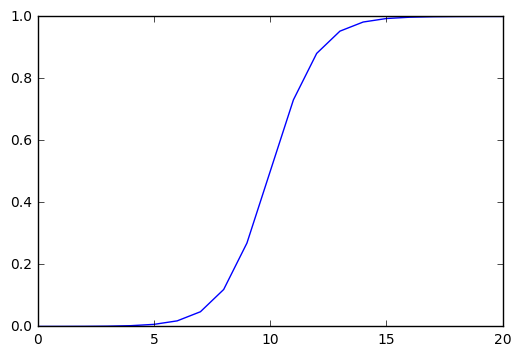

In [33]:
class Machine:
    def __init__(self, n):
        self.w = np.zeros(n)
    def h(self, x):
        return 1 / (1 + exp(-self.w.dot(x)))
    
n = 1
machine = Machine(n)
machine.w[0] = 1    
x_values = np.arange(-10,11)
y_values = []
for x in x_values:
    y_values.append(machine.h(x))

plt.plot(y_values)
plt.show()

We want our loss function to be such that when y=0 cost get's higher as h goes from 0 to 1, and opposite when y = 1:

$l(w) = -y\log(h(x)) - (1 - y)\log(1-h(x))$


When formulating loss function as above it results in:

$
l(w)=
\begin{cases}
-\log(h(x)), \quad &\text{when $y=1$} \\
-\log(1-h(x)), \quad &\text{when $y=0$}
\end{cases}
$

For Gradient descent we need the gradient of the loss function. To make things easier we should first take the derivative of the sigmoid function:

$$
\begin{align}
\sigma(x) &= \frac{1}{1+e^{-x}}, \qquad
\left(\frac{1}{v}\right)' = -\frac{v'}{v^2}, \qquad
\left(e^{f(x)}\right)'=f'(x)e^{f(x)} \\
\\
\sigma'(x) &= -\frac{(1+e^{-x})'}{(1+e^{-x})^2}
= -\frac{-e^{-x}}{(1+e^{-x})^2}
= \left(\frac{1}{1+e^{-x}}\right) \left(\frac{e^{-x}}{1+e^{-x}}\right)
= \sigma(x)\left(\frac{1+e^{-x}}{1+e^{-x}}-\frac{1}{1+e^{-x}}\right)
= \sigma(x)(1-\sigma(x))
\end{align}
$$

We can use the derivative of the sigmoid function in the middle of the derivation of the loss function: 
$h'(x)=\sigma(wx)(1-\sigma(wx))x=h(x)(1-h(x))x$

So:

$
\begin{align}
l'(w) &= -y\log'(h(x)) - (1 - y)\log'(1-h(x)) \\
&= -y\frac{h'(x)}{h(x)}-(1-y)\frac{1-h'(x)}{1-h(x)} \\
&= -y\frac{h(x)(1-h(x))x}{h(x)}-(1-y)\frac{-h(x)(1-h(x))x}{1-h(x)} \\
&= -y(1-h(x))x+(1-y)h(x)x \\
&=(-y+yh(x)+h(x)-yh(x))x \\
&=(h(x)-y)x
\end{align}
$

Above we have partial derivative of the loss function for one sample. With multiple samples it would look like this:
$
\displaystyle l'(w) = \frac{1}{m}\sum_{i=1}^{m}(h(x_i)-y_i)x_i
$

$
\displaystyle w_j = w_j - \frac{\alpha}{m}\sum_{i=1}^{m}(h(x_i)-y_i)x_i, \quad \text{for $j=1,...,K$}
$

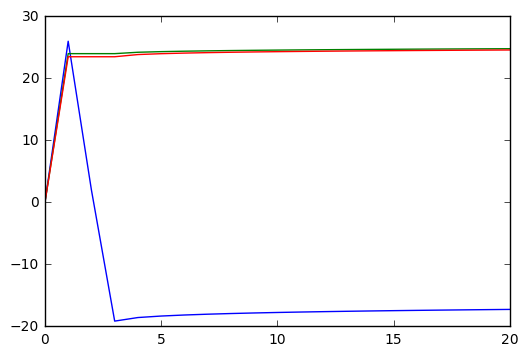

[-17.253  24.796  24.59 ]


In [138]:
class Machine:
    def __init__(self, n):
        self.w = np.zeros(n)
    def h(self, x):
        #print(self.w)
        #print(x)
        #print(np.exp(-x.dot(self.w.T)))
        return 1 / (1 + np.exp(-x.dot(self.w.T)))

def get_correct_values(x):
    ret = []
    for xs in x:
        ret.append(int(xs[0] or xs[1]))
    return ret

def gradient_descent(machine, training_set, correct_values, alpha, iterations):
    m = training_set.shape[0]
    n = training_set.shape[1]
    values = []
    values.append(np.copy(machine.w))
    #losses = []
    for i in range(0, iterations):
        d = (machine.h(training_set) - correct_values).dot(training_set)
        machine.w -= alpha * d / m
        values.append(np.copy(machine.w))
        #losses.append(((machine.h(training_set) - correct_values)**2).sum() / m)
    #print(losses)    
    plt.plot(values)
    plt.show()
    #plt.plot(losses)
    #plt.show()

def trainer(m, alpha, iterations, seed, n):
    np.random.seed(seed)
    training_set = np.random.randint(0, 2, (m,n))
    #training_set = np.insert(training_set, 0, 1, axis=1)
    #print(training_set)
    correct_values = get_correct_values(training_set)
    training_set = np.insert(training_set, 0, 1, axis=1)
    machine = Machine(n+1)
    gradient_descent(machine, training_set, correct_values, alpha, iterations)
    #print(machine.h(np.array([1,1,1])))
    #print(np.around(machine.w, decimals=3))
    print(np.around(machine.w, decimals=3))
    return machine

trainer(m = 100, alpha = 100, iterations = 20, seed = 5, n = 2)

OR is easy: Big alpha leads to optimal in less than 10 iterations. XOR is much harder: Algorithm finds it's best result easily but it doesn't represent XOR very well.

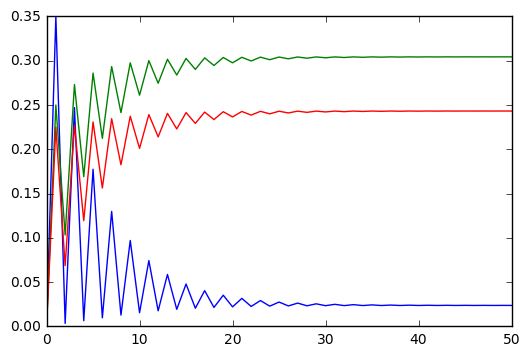

[ 0.024  0.304  0.243]
0.505929089669


In [128]:
# XOR is much harder for this algorithm

def get_correct_values(x):
    ret = []
    for xs in x:
        ret.append(int(xs[0] != xs[1]))
    return ret

machine = trainer(m = 100, alpha = 5, iterations = 50, seed = 5, n = 2)
print(machine.h(np.array([1,0,0])))

[[ 0.22027203  0.74891512  0.80662967  0.19656783]
 [ 0.76460265  0.65734626  0.97545921  0.38829315]
 [ 0.75675     0.84395362  0.37907264  0.22368808]
 [ 0.3682424   0.65282988  0.25738735  0.85849893]]


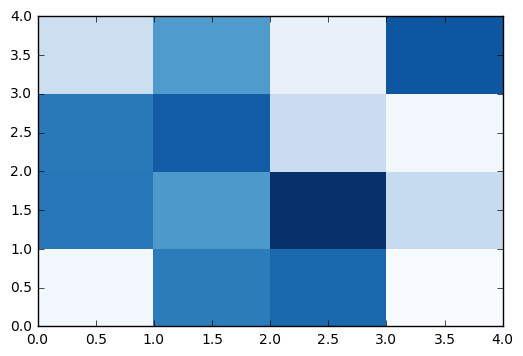

In [102]:
# Testing a visualization option

#column_labels = list('ABCD')
#row_labels = list('WXYZ')
data = np.random.rand(4,4)
#plt.plot(data)
print(data)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
#ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
#ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# want a more natural, table-like display
#ax.invert_yaxis()
#ax.xaxis.tick_top()

#ax.set_xticklabels(row_labels, minor=False)
#ax.set_yticklabels(column_labels, minor=False)
plt.show()